# Putting together a dataframe from scratch

The purpose of this code is to quickly construct a dataframe for modeling / viz testing

First, we'll install needed packages and load libraries

In [25]:
#install.packages("stringi")
#install.packages("OpenRepGrid")
#install.packages("randomNames")
#install.packages("ggplot2")
library(stringi)
library(OpenRepGrid)
library(randomNames)
library(ggplot2)

Then we'll use select functions from these packages to construct typical date, varchar, and int variables

In [26]:
#setting the number of observations
length <- 100

In [27]:
date <- sample(seq(as.Date('2020/01/01'), as.Date('2025/01/01'), by="day"), length)

name <- randomNames::randomNames(length)
id <- stringi::stri_rand_strings(length, sample(9:12, 1),pattern = "[0-9]")
sentiment <- OpenRepGrid::randomSentences(length,7)

b <- floor(runif(1, min=0, max=10000))
a <- floor(runif(1, min=0, max=100))
var1 <- sample(b:b+floor(runif(length, min=0, max=50)), length, replace=FALSE)
var2 <- sample(a:a+floor(runif(length, min=0, max=10)), length, replace=FALSE)
var3 <- rnorm(length,mean = 1000000, sd = 500000)
var4 <- rnorm(length,mean = 500, sd = 1)

In [28]:
#convert to data frame
df <- data.frame(date,name,id,sentiment,var1,var2,var3,var4)
View(df)

date,name,id,sentiment,var1,var2,var3,var4
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2024-11-12,"Luna, Richard",5581203159,he he paying money who any Johnson,4855,97,1390373.69,499.7505
2022-01-06,"Castro, Casey",6500956737,tricks the is customer back Mark he,4822,105,921843.11,499.1028
2020-10-04,"al-Rabbani, Nawfal",8149295597,paying she customer by what the,4833,106,1126525.80,500.3689
2020-03-25,"Kalkbrenner-Edmond, Isaiah",9166567058,his the forced by charter,4813,105,321120.49,500.6717
2023-11-07,"Peters, Tess",1955607433,essentially man,4837,101,77296.33,499.9085
2024-05-07,"el-Muhammed, Subhi",3561908436,realizes fishing as blackmarket,4844,98,1619602.92,499.7084
2021-08-01,"Lu, Sarah",0295417685,forces activity good,4812,100,727992.72,498.2134
2023-06-25,"Torres Hernandez, Monique",6107064974,forced Mark airplane by customer,4852,104,864118.10,499.7661
2024-12-09,"Gardella, Justin",4715344032,tricks by essentially as,4841,99,752245.93,499.2638


We can also view relationships between variables. Ultimately I'd like to see a lot of variability in the below graph,
indicating random and dirty data. What I consider to be more realistic.

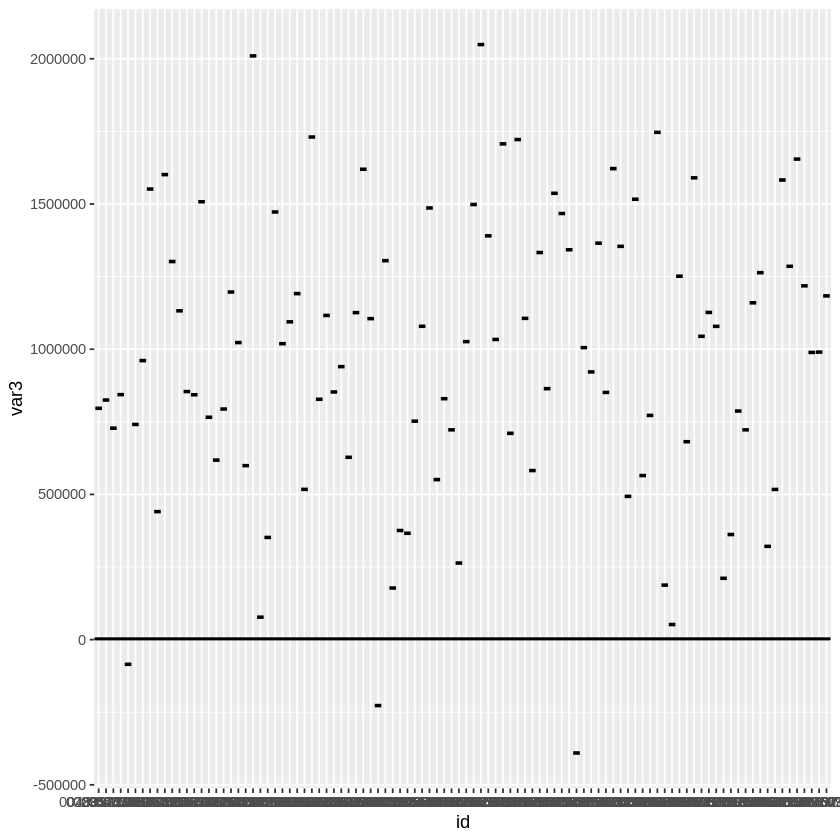

In [29]:
k <- ggplot2::ggplot(df, aes(id,var3,ymin=var1,ymax=var4))
k+geom_crossbar(fatten=2)

If I'm happy with that variability I'll go ahead and use this dataset for different modelling. I can alter the number of observations from line 39.